# ML4VA: Manipulate Flight Delay In An Efficient Way By Predictions With Machine Learning 

As flight delay is a concerning problem nowadays, it would be beneficial for both travelers and airports if patterns and predictions of these delays could be revealed. Effective predictions would not only help travelers to better prepare for the delays, but also help airports to control and reduce chained delays which is caused by the inefficient arrangement of airport facilities. Thus, we decide to work on a dataset from U.S. Department of Transportation’s Bureau of Transportation Statistics, using Regression in Machine Learning to model, compare models, and ultimately find a good way to predict future flight delays. This can benefit travelers and airports, including Virginia airports and its residents.

## PRE-PROCESSING THE DATA 

Dataset: https://www.kaggle.com/usdot/flight-delays
This dataset is from Kaggle that is original collected from the U.S. Department of Transportation’s Bureau of Transportation Statistics. 

In [0]:
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
import pandas as pd
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving flights.csv to flights.csv


In [3]:
flights = pd.read_csv("flights.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Basic Information

In [0]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

#### Data Visualization

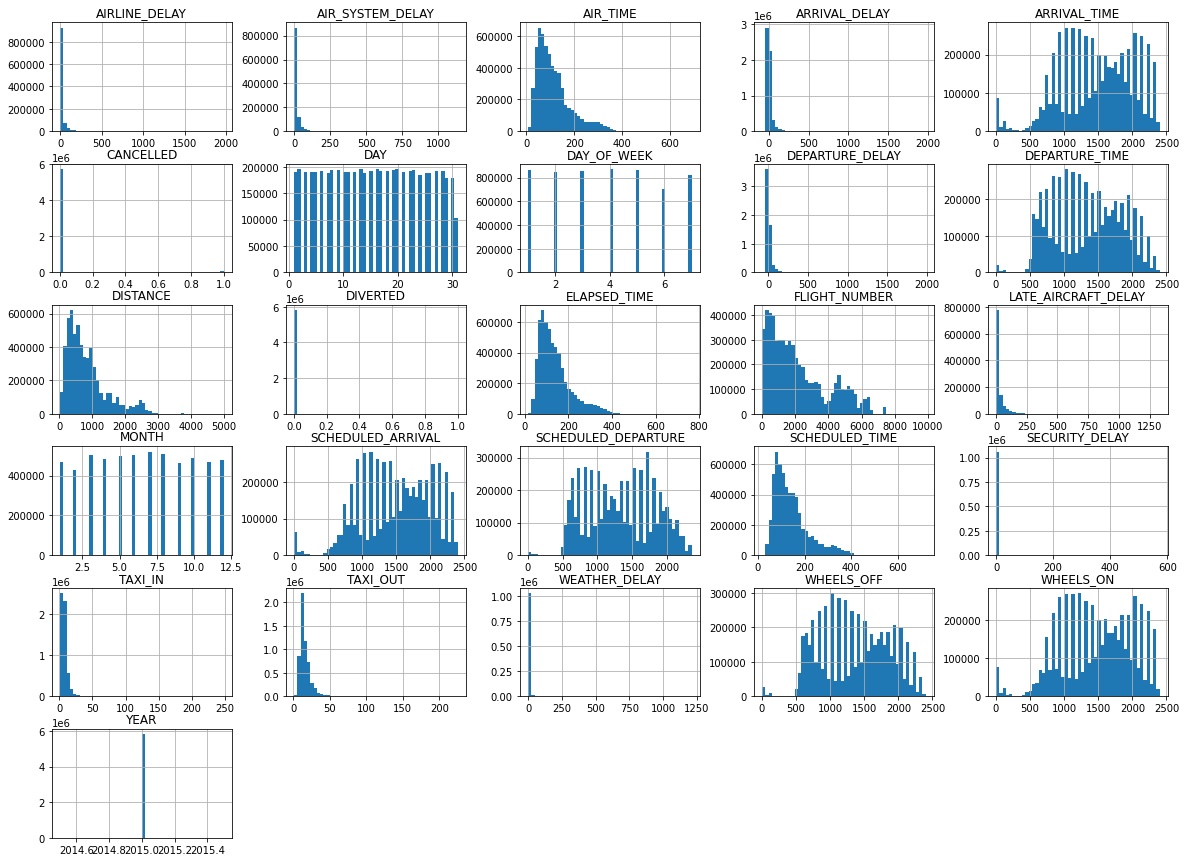

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
flights.hist(bins=50, figsize=(20,15))
plt.show()

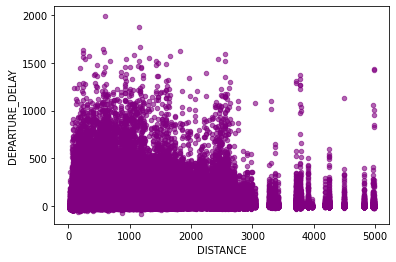

In [0]:
flights.plot(kind="scatter", x="DISTANCE", y="DEPARTURE_DELAY", alpha=0.6,color= "purple")   ## replace ??? (what is our y?) DEPARTURE_DELAY？ 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


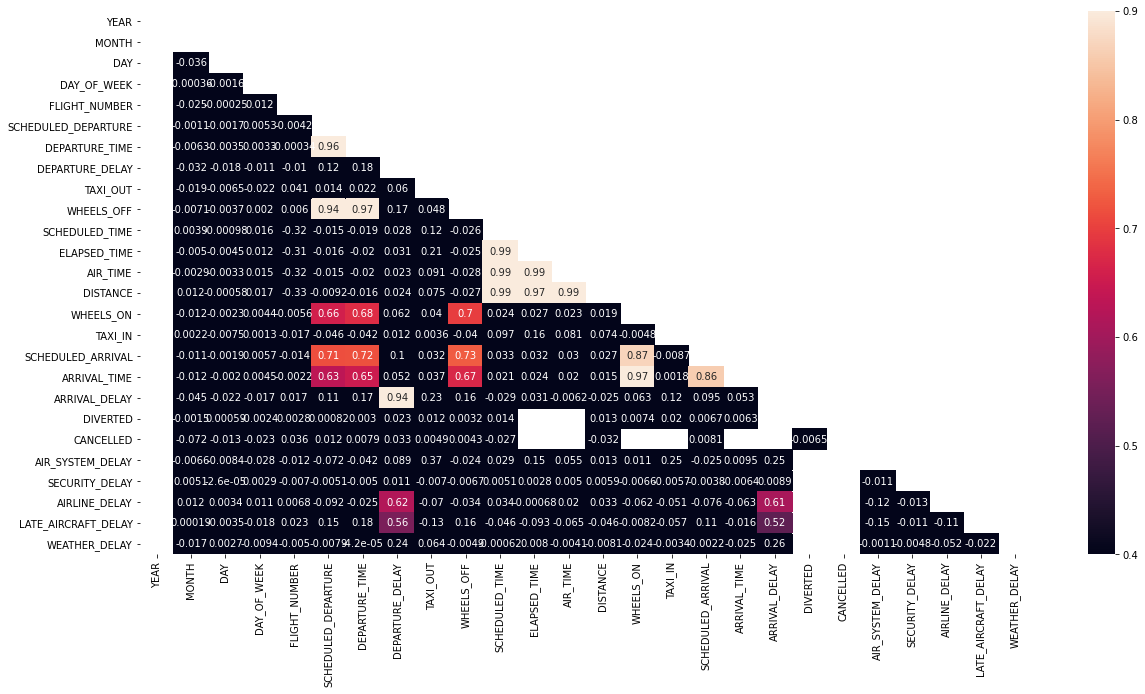

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr = flights.corr()   
mask = np.zeros_like(corr)
mask[np.triu_indices_from(corr)] = True
# Make heatmap
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,vmin=0.4,vmax=0.9, mask=mask, annot=True, fmt='.2g')

In [0]:
corr.shape
corr["DEPARTURE_DELAY"].sort_values(ascending=False)

DEPARTURE_DELAY        1.000000
ARRIVAL_DELAY          0.943904
AIRLINE_DELAY          0.620381
LATE_AIRCRAFT_DELAY    0.555407
WEATHER_DELAY          0.236578
DEPARTURE_TIME         0.178782
WHEELS_OFF             0.169197
SCHEDULED_DEPARTURE    0.117104
SCHEDULED_ARRIVAL      0.104126
AIR_SYSTEM_DELAY       0.088909
WHEELS_ON              0.062170
TAXI_OUT               0.060065
ARRIVAL_TIME           0.052383
CANCELLED              0.033378
ELAPSED_TIME           0.030963
SCHEDULED_TIME         0.028221
DISTANCE               0.023883
AIR_TIME               0.023485
DIVERTED               0.022939
TAXI_IN                0.011588
SECURITY_DELAY         0.011088
FLIGHT_NUMBER         -0.009959
DAY_OF_WEEK           -0.011450
DAY                   -0.018142
MONTH                 -0.032053
YEAR                        NaN
Name: DEPARTURE_DELAY, dtype: float64

### Data Cleaning


In [0]:
from sklearn.pipeline import Pipeline
#Drop the columns with little information and with a lot missing data
flights = flights.drop("CANCELLATION_REASON", axis=1)
flights = flights.drop("AIR_SYSTEM_DELAY", axis=1)
flights = flights.drop('SECURITY_DELAY', axis=1)
flights = flights.drop('AIRLINE_DELAY', axis=1)
flights = flights.drop('LATE_AIRCRAFT_DELAY', axis=1)
flights = flights.drop('WEATHER_DELAY', axis=1)
fl_copy = flights.copy()
flights = fl_copy.drop(['FLIGHT_NUMBER','DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 
               'DIVERTED', 'CANCELLED','WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME',
               'ARRIVAL_DELAY'],axis=1)

In [29]:
flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,DELAY_LABELS,num_LABELS
0,2015,1,1,4,AS,N407AS,ANC,SEA,5,-11.0,205.0,194.0,169.0,1448,430,NO,0.0
1,2015,1,1,4,AA,N3KUAA,LAX,PBI,10,-8.0,280.0,279.0,263.0,2330,750,NO,0.0
2,2015,1,1,4,US,N171US,SFO,CLT,20,-2.0,286.0,293.0,266.0,2296,806,NO,0.0
3,2015,1,1,4,AA,N3HYAA,LAX,MIA,20,-5.0,285.0,281.0,258.0,2342,805,NO,0.0
4,2015,1,1,4,AS,N527AS,SEA,ANC,25,-1.0,235.0,215.0,199.0,1448,320,NO,0.0
5,2015,1,1,4,DL,N3730B,SFO,MSP,25,-5.0,217.0,230.0,206.0,1589,602,NO,0.0
6,2015,1,1,4,NK,N635NK,LAS,MSP,25,-6.0,181.0,170.0,154.0,1299,526,NO,0.0
7,2015,1,1,4,US,N584UW,LAX,CLT,30,14.0,273.0,249.0,228.0,2125,803,Short,2.0
8,2015,1,1,4,AA,N3LAAA,SFO,DFW,30,-11.0,195.0,193.0,173.0,1464,545,NO,0.0
9,2015,1,1,4,DL,N826DN,LAS,ATL,30,3.0,221.0,203.0,186.0,1747,711,Minor,1.0


In [0]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = flights[flights.isnull().any(axis=1)].head()
sample_incomplete_rows

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,N407AS,ANC,SEA,5,-11.0,205.0,194.0,169.0,1448,430,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,N3KUAA,LAX,PBI,10,-8.0,280.0,279.0,263.0,2330,750,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,N171US,SFO,CLT,20,-2.0,286.0,293.0,266.0,2296,806,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,N3HYAA,LAX,MIA,20,-5.0,285.0,281.0,258.0,2342,805,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,N527AS,SEA,ANC,25,-1.0,235.0,215.0,199.0,1448,320,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights.dropna(inplace= True)
sample_incomplete_rows_1 = flights[flights.isnull().any(axis=1)].head()
sample_incomplete_rows_1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL


In [0]:
#add labels for classification
flights.loc[flights['DEPARTURE_DELAY']<=0,'DELAY_LABELS']= "NO"
flights.loc[(flights['DEPARTURE_DELAY']<=10) & (flights['DEPARTURE_DELAY']>0),'DELAY_LABELS']= "Minor"
flights.loc[(flights['DEPARTURE_DELAY']<=30) & (flights['DEPARTURE_DELAY']>10),'DELAY_LABELS']= "Short"
flights.loc[(flights['DEPARTURE_DELAY']<=60) & (flights['DEPARTURE_DELAY']>30),'DELAY_LABELS']= "Medium"
flights.loc[(flights['DEPARTURE_DELAY']<=120) & (flights['DEPARTURE_DELAY']>60),'DELAY_LABELS']= "Long"
flights.loc[flights['DEPARTURE_DELAY']>120,'DELAY_LABELS']= "Severe"
flights.loc[flights['DELAY_LABELS']=="NO", 'num_LABELS']=0
flights.loc[flights['DELAY_LABELS']=="Minor", 'num_LABELS']=1
flights.loc[flights['DELAY_LABELS']=="Short", 'num_LABELS']=2
flights.loc[flights['DELAY_LABELS']=="Medium", 'num_LABELS']=3
flights.loc[flights['DELAY_LABELS']=="Long", 'num_LABELS']=4
flights.loc[flights['DELAY_LABELS']=="Severe", 'num_LABELS']=5

In [0]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'DELAY_LABELS', 'num_LABELS'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(flights, test_size=0.35, random_state=42)

In [0]:
flights_train = train_set.drop(['DEPARTURE_DELAY','DELAY_LABELS','num_LABELS'], axis=1) # drop labels for training set
flights_train_labels = train_set[['DEPARTURE_DELAY','DELAY_LABELS','num_LABELS']].copy()
test_X = test_set.drop(['DEPARTURE_DELAY','DELAY_LABELS','num_LABELS'], axis=1) # drop labels for testing set
test_y = test_set[['DEPARTURE_DELAY','DELAY_LABELS','num_LABELS']].copy()

In [0]:
import pandas as pd
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = ["YEAR","MONTH","DAY", "DAY_OF_WEEK",
                             "SCHEDULED_DEPARTURE", "SCHEDULED_TIME",
                             "ELAPSED_TIME", "AIR_TIME", "DISTANCE",
                             "SCHEDULED_ARRIVAL"]
cat_attribs = ["AIRLINE","TAIL_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
flights_train[cat_attribs] = flights_train[cat_attribs].astype('|S')
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [0]:
flights_prepared = full_pipeline.fit_transform(flights_train)

## Select and train a model

### Regression Models

#### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(flights_prepared,flights_train_labels["DEPARTURE_DELAY"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
import pandas as pd
import numpy as np

In [15]:
flights_predictions = lin_reg.predict(flights_prepared)
lin_mse = mean_squared_error(flights_train_labels["DEPARTURE_DELAY"], flights_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

36.55038704058895

Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

5-fold Cross Validation

In [18]:
lin_scores = cross_val_score(lin_reg, flights_prepared, flights_train_labels["DEPARTURE_DELAY"],
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [36.43313261 36.67876027 36.41228771 36.6624638  36.56540967]
Mean: 36.550410813645
Standard deviation: 0.11143301815265581


Leave-one-out Cross Validation

Since Leave One Out Cross Validation is just a special case of K- Fold Cross Validation where k is the number of samples in the dataset, we just let cv = number of instances. (not impossible in our case, detailed explanation is in the report)

In [0]:
lin_scores_k = cross_val_score(lin_reg, flights_prepared, flights_train_labels["DEPARTURE_DELAY"],
                             scoring="neg_mean_squared_error", cv=flights_prepared.shape[0]) 
lin_rmse_scores_k = np.sqrt(-lin_scores_k)
display_scores(lin_rmse_scores_k)

#### Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(flights_prepared, flights_train_labels["DEPARTURE_DELAY"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np
f_predictions = tree_reg.predict(flights_prepared)
tree_mse = mean_squared_error(flights_train_labels["DEPARTURE_DELAY"], f_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.09452722507223758

5-fold Cross Validation

In [18]:
scores = cross_val_score(tree_reg, flights_prepared, flights_train_labels["DEPARTURE_DELAY"],
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [52.35679164 52.55018576 52.52859753 52.46276085 52.87825976]
Mean: 52.55531910972788
Standard deviation: 0.17493498629677987


Leave-one-out Cross Validation

In [0]:
tree_scores_k = cross_val_score(tree_reg, flights_prepared, flights_train_labels["DEPARTURE_DELAY"],
                             scoring="neg_mean_squared_error", cv=flights_prepared.shape[0])
tree_rmse_scores_k = np.sqrt(-tree_scores_k)
display_scores(tree_rmse_scores_k)

#### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
forest_reg = RandomForestRegressor(n_estimators=5, random_state=42)
forest_reg.fit(flights_prepared, flights_train_labels['DEPARTURE_DELAY'])
flights_predictions = forest_reg.predict(flights_prepared)
forest_mse = mean_squared_error(flights_train_labels['DEPARTURE_DELAY'], flights_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse 

18.58502124302696

5-fold Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
forest_reg = RandomForestRegressor(n_estimators=5, random_state=42)

In [0]:
forest_scores = cross_val_score(forest_reg, flights_prepared, flights_train_labels['DEPARTURE_DELAY'],
                                scoring="neg_mean_squared_error", cv=5)

In [36]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [39.96080053 40.24164228 39.95879762 40.14176723 40.18264968]
Mean: 40.09713146827457
Standard deviation: 0.1165430954765014


Leave-one-out Cross Validation

In [0]:
forest_scores_k = cross_val_score(forest_scores, flights_prepared, flights_labels,
                             scoring="neg_mean_squared_error", cv=flights_prepared.shape[0])
forest_rmse_scores_k = np.sqrt(-forest_scores_k)
display_scores(forest_rmse_scores_k)

### Classifier

#### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%time
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


In [0]:
rf.fit(flights_prepared, flights_train_labels["DELAY_LABELS"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [0]:
#only use numeric attributes
X_train = flights_train[num_attribs]
X_test = test_X[num_attribs]
X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.transform(X_test)

In [0]:
rf.fit(X_train, flights_train_labels["DELAY_LABELS"]) #now using labels instead of numeric values

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

In [0]:
pred_y = rf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
true_y = test_y["DELAY_LABELS"]
print("\nDetailed classification report: \n%s" %classification_report(true_y, pred_y))


Detailed classification report: 
              precision    recall  f1-score   support

        Long       0.09      0.17      0.12     72092
      Medium       0.10      0.16      0.13    109842
       Minor       0.22      0.22      0.22    308653
          NO       0.75      0.61      0.67   1259613
      Severe       0.09      0.16      0.11     40170
       Short       0.16      0.21      0.18    209533

    accuracy                           0.46   1999903
   macro avg       0.23      0.26      0.24   1999903
weighted avg       0.53      0.46      0.49   1999903



In [0]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(true_y, pred_y)
print("Test Accuray", acc_score)

Test Accuray 0.4599688084872116


#### KNeighbors Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn import metrics
y_train = flights_train_labels['DELAY_LABELS']
kn=KNeighborsClassifier(n_neighbors=5,weights='distance',metric='l2').fit(X_train, y_train)

In [0]:
true_y_2 = test_y["DELAY_LABELS"]
pred_y_2 = kn.predict(X_test)

In [0]:
print("\nDetailed classification report: \n%s" %classification_report(true_y_2, pred_y_2))


Detailed classification report: 
              precision    recall  f1-score   support

        Long       0.12      0.04      0.06     72092
      Medium       0.12      0.05      0.07    109842
       Minor       0.19      0.11      0.14    308653
          NO       0.66      0.85      0.75   1259613
      Severe       0.13      0.04      0.06     40170
       Short       0.16      0.09      0.11    209533

    accuracy                           0.57   1999903
   macro avg       0.23      0.20      0.20   1999903
weighted avg       0.48      0.57      0.51   1999903



In [0]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_y_2, pred_y_2)
print("Test Accuray", acc)

Test Accuray 0.5677640365557729


#### Gaussian Naive Bayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
predicted_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print("Test Accuray", accuracy_test)

Test Accuray 0.5954163776943182


In [0]:
true_y_3 = test_y["DELAY_LABELS"]
pred_y_3 = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nDetailed classification report: \n%s" %classification_report(true_y_3, pred_y_3))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Detailed classification report: 
              precision    recall  f1-score   support

        Long       0.00      0.00      0.00     72092
      Medium       0.00      0.00      0.00    109842
       Minor       0.20      0.13      0.16    308653
          NO       0.64      0.91      0.75   1259613
      Severe       0.00      0.00      0.00     40170
       Short       0.22      0.00      0.00    209533

    accuracy                           0.60   1999903
   macro avg       0.18      0.17      0.15   1999903
weighted avg       0.46      0.60      0.50   1999903



### Neutal Network

In [21]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='linear'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='linear'))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='linear'))
model.add(BatchNormalization())

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='linear'))
model.add(BatchNormalization())

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='linear'))
model.add(BatchNormalization())

model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='linear'))
model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))


In [0]:
# only use numeric attributes
X_train = flights_train[num_attribs]
X_test = test_X[num_attribs]
X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.transform(X_test)

In [0]:
%time
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=["accuracy"])
y_train = flights_train_labels['num_LABELS'].ravel()
model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=1024)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Epoch 1/10
 - 27s - loss: 0.7689 - accuracy: 0.5744
Epoch 2/10
 - 26s - loss: 0.7570 - accuracy: 0.5906
Epoch 3/10
 - 26s - loss: 0.7568 - accuracy: 0.5871
Epoch 4/10
 - 26s - loss: 0.7557 - accuracy: 0.5893
Epoch 5/10
 - 27s - loss: 0.7569 - accuracy: 0.5887
Epoch 6/10
 - 26s - loss: 0.7574 - accuracy: 0.5954
Epoch 7/10
 - 26s - loss: 0.7577 - accuracy: 0.5917
Epoch 8/10
 - 26s - loss: 0.7580 - accuracy: 0.5955
Epoch 9/10
 - 26s - loss: 0.7563 - accuracy: 0.5903
Epoch 10/10
 - 26s - loss: 0.7590 - accuracy: 0.5956


In [0]:
y_test = test_y["num_LABELS"]
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)

1999903/1999903 [==============================] - 48s 24us/step
Test accuracy: 0.5984085202217102


## Final Model

In [0]:
#drop columns with unknown variables and split again
flights.drop(flights.loc[flights['TAIL_NUMBER']==b'N844MH'].index, inplace=True)
flights.drop(flights.loc[flights['TAIL_NUMBER']==b'N121UA'].index, inplace=True)
flights.drop(flights.loc[flights['TAIL_NUMBER']==b'N180UA'].index, inplace=True)
flights.drop(flights.loc[flights['TAIL_NUMBER']==b'N860NW'].index, inplace=True)

In [0]:
train_set, test_set = train_test_split(flights, test_size=0.35, random_state=42)
test_X = test_set.drop(['DEPARTURE_DELAY','DELAY_LABELS','num_LABELS'], axis=1) # drop labels for testing set
test_y = test_set[['DEPARTURE_DELAY','DELAY_LABELS','num_LABELS']].copy()

In [0]:
X_test = test_X.copy()
y_test = test_y['DEPARTURE_DELAY']
X_test_prepared = full_pipeline.transform(X_test)

Parameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    # try 9 combinations of hyperparameters
    {'n_estimators': [5, 10, 20], 'max_features': [2, 6, 8]},
  ]

fr = RandomForestRegressor(random_state=42)
# train across 5 folds
grid_search = GridSearchCV(fr, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
#since the training set is too large, we use a slice of them for hyperparameter tuning
X_train_Batch = full_pipeline.fit_transform(flights_train[:300000])
X_test_Batch = flights_train_labels["DEPARTURE_DELAY"][:300000]

In [0]:
grid_search.fit(X_train_Batch, X_test_Batch)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Final Evaluation

In [0]:
from sklearn.ensemble import RandomForestRegressor
final_model = grid_search.best_estimator_

In [33]:
final_model.fit(flights_prepared, flights_train_labels['DEPARTURE_DELAY']) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
final_predictions = final_model.predict(X_test_prepared)

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [36]:
final_rmse

37.01124131288024